In [18]:
#importing os, shutil and glob for copying concrete images from raw folder to the new structure which is 
#required for ImageDataGenerator.flow_from_directory
import os
import shutil
import glob

In [19]:
###Main directory where concrete images dataset is present##########
mainDir = 'concrete_dataset/ConcreteCrackImagesforClassification/'

In [20]:
#storing locations of crack images in crack_images list
crack_images = os.listdir(mainDir+'Positive/')
print('total number of images of concrete with cracks are : ', len(crack_images))

total number of images of concrete with cracks are :  20000


In [21]:
#storing locations of uncrack images in uncrack_images list
uncrack_images = os.listdir(mainDir+'Negative/')
print('total number of images of concrete without cracks are : ', len(uncrack_images))

total number of images of concrete without cracks are :  20000


## Let's visualize the images

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
%matplotlib inline

***************Images of concrete with cracks**********************


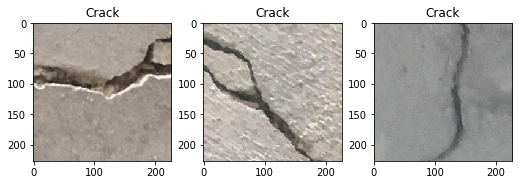

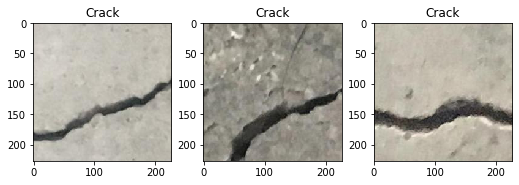

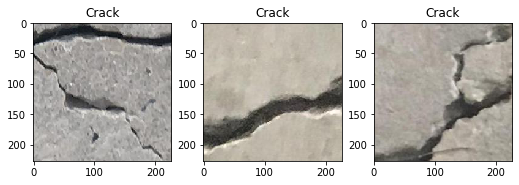

In [6]:
##Displaying images with crack
random_crack_images_indices = np.random.randint(0, len(crack_images), 9)
random_crack_images = [crack_images[index] for index in random_crack_images_indices]
print('***************Images of concrete with cracks**********************')
imindex = 0
for i in range(3):
    fig = plt.figure(figsize=(30, 30))
    for j in range(3):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(mpimg.imread(os.path.join(mainDir, 'Positive/', random_crack_images[imindex])))
        axisarr.set_title('Crack')
        imindex += 1
plt.show()

***************Images of concrete without cracks**********************


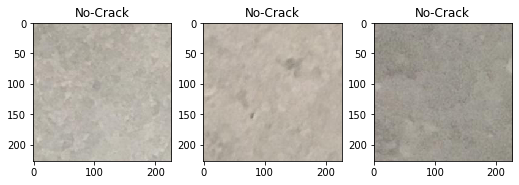

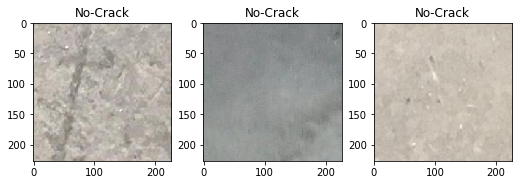

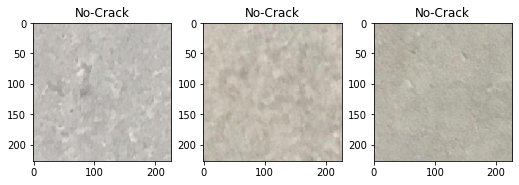

In [7]:
##Displaying images without crack
random_uncrack_images_indices = np.random.randint(0, len(uncrack_images), 9)
random_uncrack_images = [uncrack_images[index] for index in random_uncrack_images_indices]
print('***************Images of concrete without cracks**********************')
imindex = 0
for i in range(3):
    fig = plt.figure(figsize=(30, 30))
    for j in range(3):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(mpimg.imread(os.path.join(mainDir, 'Negative/', random_uncrack_images[imindex])))
        axisarr.set_title('No-Crack')
        imindex += 1
plt.show()

# First we will use only 8K images out of total 40K images

# 4K images with crack and 4K images without crack

#### Make folders and move images into them

#### This schema will be used by ImageDataGeneratorClass of Keras

In [10]:
#creating directory structures which is required for our model to train.
#first we will create folders and will store total 8K images(4K images with crack and 4K images without crack)
os.mkdir('data_8k')
os.mkdir('data_8k/train')
os.mkdir('data_8k/test')
os.mkdir('data_8k/validation')
os.mkdir('data_8k/visualization/real_images')

os.mkdir('data_8k/train/crack')
os.mkdir('data_8k/train/uncrack')
os.mkdir('data_8k/test/crack')
os.mkdir('data_8k/test/uncrack')
os.mkdir('data_8k/validation/crack')
os.mkdir('data_8k/validation/uncrack')

In [27]:
crack_images_path = [os.path.join(mainDir, 'Positive/', image) for image in crack_images]
uncrack_images_path = [os.path.join(mainDir, 'Negative/', image) for image in uncrack_images]

In [28]:
#lets shuffle these images
import random
random.shuffle(crack_images_path)
random.shuffle(uncrack_images_path)

In [15]:
#now since the crack and uncrack images list is shuffled, let's choose first 4K images from crack and uncrack images
first_4K_crack_images_path = crack_images_path[0:4000]
first_4K_uncrack_images_path = uncrack_images_path[0:4000]

In [17]:
print(len(first_4K_crack_images_path), len(first_4K_uncrack_images_path))

4000 4000


In [19]:
#split crack and uncrack images into train, test, validation and visualization
#70% for training and rest 30% for testing(15%), validation(almost 15%), visualization(5 images each from cracks and non-cracks)
train_crack_4K = first_4K_crack_images_path[0:2800]  #out of 4K, 2.8K images are for training the model
test_crack_4K = first_4K_crack_images_path[2800:3400]  #out of 4K, 600 images are for testing the model
validation_crack_4K = first_4K_crack_images_path[3400:3995]  #out of 4K, 595 images are for validation of the model
visualization_crack_4K = first_4K_crack_images_path[3995:4000]  #5 are reserved for visualization of the model

train_uncrack_4K = first_4K_uncrack_images_path[0:2800]  #out of 4K, 2.8K images are for training the model
test_uncrack_4K = first_4K_uncrack_images_path[2800:3400]  #out of 4K, 600 images are for testing the model
validation_uncrack_4K = first_4K_uncrack_images_path[3400:3995]  #out of 4K, 595 images are for validation of the model
visualization_uncrack_4K = first_4K_uncrack_images_path[3995:4000]  #5 are reserved for visualization of the model

In [21]:
#now copy these images into the respective folders

base_dir = 'data_8k/'

#copying train_crack into data_8K/train/crack
for image in train_crack_4K:
    dest = os.path.join(base_dir, 'train/crack/')
    shutil.copy(image, dest)

#copying test_crack into data_8K/test/crack
for image in test_crack_4K:
    dest = os.path.join(base_dir, 'test/crack/')
    shutil.copy(image, dest)
    
#copying validation_crack into data_8K/validation/crack
for image in validation_crack_4K:
    dest = os.path.join(base_dir, 'validation/crack/')
    shutil.copy(image, dest)
    
#copying visualization_cracl into data_8K/visualization
for image in visualization_crack_4K:
    dest = os.path.join(base_dir, 'visualization/')
    shutil.copy(image, dest)
    
#copying train_uncrack into data_8K/train/uncrack
for image in train_uncrack_4K:
    dest = os.path.join(base_dir, 'train/uncrack/')
    shutil.copy(image, dest)
    
#copying test_uncrack into data_8K/test/uncrack
for image in test_uncrack_4K:
    dest = os.path.join(base_dir, 'test/uncrack/')
    shutil.copy(image, dest)
    
#copying validation_uncrack into data_8K/validation/uncrack
for image in validation_uncrack_4K:
    dest = os.path.join(base_dir, 'validation/uncrack/')
    shutil.copy(image, dest)
    
#copying visualization into data_8K/visualization
for image in visualization_uncrack_4K:
    dest = os.path.join(base_dir, 'visualization/')
    shutil.copy(image, dest)

### LeNet - 5 CNN Model for 8K images

In [2]:
#import keras and different type of layers for for defining CNN models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.metrics import Precision, Recall

In [3]:
lenetModel = Sequential()
lenetModel.add(Conv2D(6, (5, 5), strides=(1, 1), padding='valid', input_shape=(227, 227, 3)))
lenetModel.add(Activation('relu'))
lenetModel.add(AveragePooling2D(pool_size=(2, 2), strides=(2,2)))

lenetModel.add(Conv2D(16, (5, 5), padding='valid'))
lenetModel.add(Activation('relu'))
lenetModel.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

lenetModel.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
lenetModel.add(Dense(120))
lenetModel.add(Activation('relu'))
lenetModel.add(Dense(units=84))
lenetModel.add(Activation('relu'))
lenetModel.add(Dense(1)) # this our output layer (since this is binary classification of cracked or uncracked, we use only one unit in output layer).
lenetModel.add(Activation('sigmoid'))

lenetModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
lenetModel.summary()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 6)       456       
_________________________________________________________________
activation_1 (Activation)    (None, 223, 223, 6)       0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 107, 107, 16)      2416      
_________________________________________________________________
activation_2 (Activation)    (None, 107, 107, 16)      0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 53, 53, 16)        0         
_________________________

In [ ]:
# lenetModel.load_weights('lenetModelWeights_8K.h5')

In [4]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32

# this is the augmentation configuration we will use for training
#here along with rescaling, we are also changing the orientation of the image in only training dataset, 
#this is we are doing so that our model never sees the same image, and this will help in fighting overfitting.
train_datagen_8K = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing, validation, visualization:
# only rescaling
test_datagen_8K = ImageDataGenerator(rescale=1./255)
validation_datagen_8K = ImageDataGenerator(rescale=1./255)
visualization_datagen_8K = ImageDataGenerator(rescale=1./255)


# this is a generator that will read pictures found in
# subfolers of 'master_data/train', and indefinitely generate
# batches of augmented image data
train_generator_8K = train_datagen_8K.flow_from_directory(
        'data_8k/train',  # this is the target directory
        target_size=(227, 227),  # all images will be resized to 227*227
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for test data
test_generator_8K = test_datagen_8K.flow_from_directory(
        'data_8k/test',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for validation data
validation_generator_8K = validation_datagen_8K.flow_from_directory(
        'data_8k/validation',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for visualization data
visualization_generator_8K = visualization_datagen_8K.flow_from_directory(
        'data_8k/visualization',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

Found 5600 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 1190 images belonging to 2 classes.
Found 10 images belonging to 1 classes.


In [5]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

In [6]:
import time
start_time = time.time() 
lenetModel.fit_generator(
        train_generator_8K,
        epochs=10,
        validation_data=validation_generator_8K,
        callbacks=[es]
)
finish_time = time.time()
time_taken = finish_time-start_time
print('\n')
print('Training complete in {:.0f}m {:.0f}s'.format(time_taken // 60, time_taken % 60))


Epoch 1/10
175/175 [==============================] - 52s 296ms/step - loss: 0.2687 - accuracy: 0.8879 - precision_1: 0.8647 - recall_1: 0.9196 - val_loss: 0.0217 - val_accuracy: 0.9840 - val_precision_1: 0.9721 - val_recall_1: 0.9966
Epoch 2/10
175/175 [==============================] - 48s 274ms/step - loss: 0.0780 - accuracy: 0.9741 - precision_1: 0.9637 - recall_1: 0.9854 - val_loss: 0.0738 - val_accuracy: 0.9773 - val_precision_1: 0.9965 - val_recall_1: 0.9580
Epoch 3/10
175/175 [==============================] - 48s 273ms/step - loss: 0.0665 - accuracy: 0.9800 - precision_1: 0.9732 - recall_1: 0.9871 - val_loss: 0.0063 - val_accuracy: 0.9857 - val_precision_1: 0.9738 - val_recall_1: 0.9983
Epoch 4/10
175/175 [==============================] - 48s 274ms/step - loss: 0.0639 - accuracy: 0.9786 - precision_1: 0.9722 - recall_1: 0.9854 - val_loss: 0.0239 - val_accuracy: 0.9899 - val_precision_1: 0.9932 - val_recall_1: 0.9866
Epoch 5/10
175/175 [==============================] - 48s 2

In [8]:
test_loss_8K, accuracy_8K, precision_8K, recall_8K = lenetModel.evaluate_generator(test_generator_8K)

In [10]:
print(' accuracy_8K : ', accuracy_8K, '\n', 'precision_8K : ', precision_8K, '\n', 'recall_8K : ', recall_8K)

 accuracy_8K :  0.987500011920929 
 precision_8K :  0.9899497628211975 
 recall_8K :  0.9850000143051147


### VISUALISING PREDICTIONS OF LENET MODEL TRAINED ON 8K IMAGES

In [13]:
imgarr_8K = visualization_generator_8K[0][0]
imgarr_8K.shape

(10, 227, 227, 3)

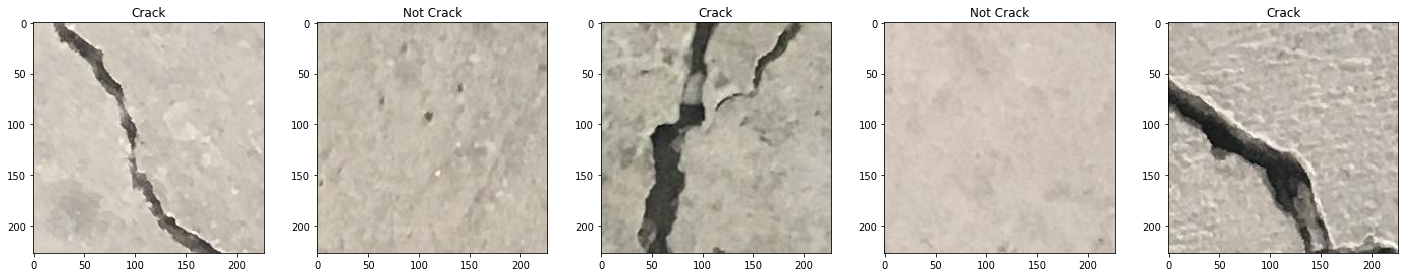

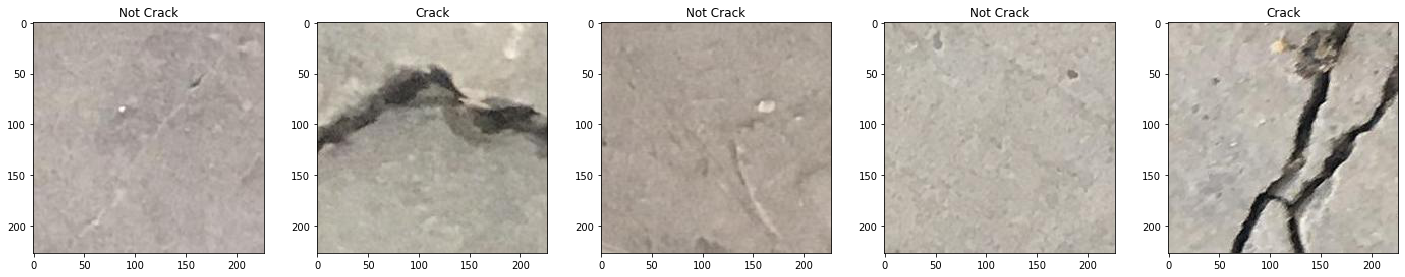

In [17]:
import numpy as np

predictions = lenetModel.predict(imgarr_8K)
pred_class_arr = np.array(predictions).round()
counter = 0
for i in range(2):
    fig = plt.figure(figsize=(50, 50))
    for j in range(5):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(imgarr_8K[counter])
        if(pred_class_arr[counter] == 0):
            axisarr.set_title('Crack')
        else:
            axisarr.set_title('Not Crack')
        counter += 1

In [25]:
#save the model
lenetModel.save(
    'lenet_model_8K.h5',
    overwrite=True,
    include_optimizer=True,
)

In [52]:
lenetModel.save_weights('lenetModelWeights_8K.h5')

# Now we will use 16K images out of total 40K images
# 8K images with crack and 8K images without crack
#### Make folders and move images into them
#### This schema will be used by ImageDataGeneratorClass of Keras

In [26]:
#creating directory structures which is required for our model to train.
#first we will create folders and will store total 16K images(8K images with crack and 8K images without crack)
os.mkdir('data_16k')
os.mkdir('data_16k/train')
os.mkdir('data_16k/test')
os.mkdir('data_16k/validation')
os.mkdir('data_16k/visualization/real_images')

os.mkdir('data_16k/train/crack')
os.mkdir('data_16k/train/uncrack')
os.mkdir('data_16k/test/crack')
os.mkdir('data_16k/test/uncrack')
os.mkdir('data_16k/validation/crack')
os.mkdir('data_16k/validation/uncrack')

In [29]:
#let's choose first 8K images from crack and uncrack images
first_8K_crack_images_path = crack_images_path[0:8000]
first_8K_uncrack_images_path = uncrack_images_path[0:8000]

In [30]:
print(len(first_8K_crack_images_path), len(first_8K_uncrack_images_path))

8000 8000


In [31]:
#split crack and uncrack images into train, test, validation and visualization
#70% for training and rest 30% for testing(15%), validation(almost 15%), visualization(5 images each from cracks and non-cracks)
train_crack_8K = first_8K_crack_images_path[0:5600]  #out of 8K, 5.6K images are for training the model
test_crack_8K = first_8K_crack_images_path[5600:6800]  #out of 8K, 1.2K images are for testing the model
validation_crack_8K = first_8K_crack_images_path[6800:7995]  #out of 8K, 1.195K images are for validation of the model
visualization_crack_8K = first_8K_crack_images_path[7995:8000]  #5 are reserved for visualization of the model

train_uncrack_8K = first_8K_uncrack_images_path[0:5600]  #out of 8K, 5.6K images are for training the model
test_uncrack_8K = first_8K_uncrack_images_path[5600:6800]  #out of 8K, 1.2K images are for testing the model
validation_uncrack_8K = first_8K_uncrack_images_path[6800:7995]  #out of 8K, 1.195K images are for validation of the model
visualization_uncrack_8K = first_8K_uncrack_images_path[7995:8000]  #5 are reserved for visualization of the model

In [32]:
#now copy these images into the respective folders

base_dir = 'data_16k/'

#copying train_crack into data_16K/train/crack
for image in train_crack_8K:
    dest = os.path.join(base_dir, 'train/crack/')
    shutil.copy(image, dest)

#copying test_crack into data_16K/test/crack
for image in test_crack_8K:
    dest = os.path.join(base_dir, 'test/crack/')
    shutil.copy(image, dest)
    
#copying validation_crack into data_16K/validation/crack
for image in validation_crack_8K:
    dest = os.path.join(base_dir, 'validation/crack/')
    shutil.copy(image, dest)
    
#copying visualization_cracl into data_16K/visualization
for image in visualization_crack_8K:
    dest = os.path.join(base_dir, 'visualization/real_images')
    shutil.copy(image, dest)
    
#copying train_uncrack into data_16K/train/uncrack
for image in train_uncrack_8K:
    dest = os.path.join(base_dir, 'train/uncrack/')
    shutil.copy(image, dest)
    
#copying test_uncrack into data_16K/test/uncrack
for image in test_uncrack_8K:
    dest = os.path.join(base_dir, 'test/uncrack/')
    shutil.copy(image, dest)
    
#copying validation_uncrack into data_16K/validation/uncrack
for image in validation_uncrack_8K:
    dest = os.path.join(base_dir, 'validation/uncrack/')
    shutil.copy(image, dest)
    
#copying visualization into data_16K/visualization
for image in visualization_uncrack_8K:
    dest = os.path.join(base_dir, 'visualization/real_images')
    shutil.copy(image, dest)

### LeNet - 5 CNN Model for 16K images

In [33]:
lenetModel_16K = Sequential()
lenetModel_16K.add(Conv2D(6, (5, 5), strides=(1, 1), padding='valid', input_shape=(227, 227, 3)))
lenetModel_16K.add(Activation('relu'))
lenetModel_16K.add(AveragePooling2D(pool_size=(2, 2), strides=(2,2)))

lenetModel_16K.add(Conv2D(16, (5, 5), padding='valid'))
lenetModel_16K.add(Activation('relu'))
lenetModel_16K.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

lenetModel_16K.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
lenetModel_16K.add(Dense(120))
lenetModel_16K.add(Activation('relu'))
lenetModel_16K.add(Dense(units=84))
lenetModel_16K.add(Activation('relu'))
lenetModel_16K.add(Dense(1)) # this our output layer (since this is binary classification of cracked or uncracked, we use only one unit in output layer).
lenetModel_16K.add(Activation('sigmoid'))

lenetModel_16K.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
lenetModel_16K.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 223, 223, 6)       456       
_________________________________________________________________
activation_6 (Activation)    (None, 223, 223, 6)       0         
_________________________________________________________________
average_pooling2d_3 (Average (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 107, 107, 16)      2416      
_________________________________________________________________
activation_7 (Activation)    (None, 107, 107, 16)      0         
_________________________________________________________________
average_pooling2d_4 (Average (None, 53, 53, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 44944)            

In [ ]:
# lenetModel_16K.load_weights('lenetModelWeights_16K.h5')

In [34]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32

# this is the augmentation configuration we will use for training
#here along with rescaling, we are also changing the orientation of the image in only training dataset, 
#this is we are doing so that our model never sees the same image, and this will help in fighting overfitting.
train_datagen_16K = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing, validation, visualization:
# only rescaling
test_datagen_16K = ImageDataGenerator(rescale=1./255)
validation_datagen_16K = ImageDataGenerator(rescale=1./255)
visualization_datagen_16K = ImageDataGenerator(rescale=1./255)


# this is a generator that will read pictures found in
# subfolers of 'master_data/train', and indefinitely generate
# batches of augmented image data
train_generator_16K = train_datagen_16K.flow_from_directory(
        'data_16k/train',  # this is the target directory
        target_size=(227, 227),  # all images will be resized to 227*227
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for test data
test_generator_16K = test_datagen_16K.flow_from_directory(
        'data_16k/test',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for validation data
validation_generator_16K = validation_datagen_16K.flow_from_directory(
        'data_16k/validation',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for visualization data
visualization_generator_16K = visualization_datagen_16K.flow_from_directory(
        'data_16k/visualization',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

Found 11200 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.
Found 2390 images belonging to 2 classes.
Found 10 images belonging to 1 classes.


In [44]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

In [45]:
import time
start_time_16k = time.time() 
lenetModel_16K.fit_generator(
        train_generator_16K,
        epochs=10,
        validation_data=validation_generator_16K,
        callbacks=[es]
)
finish_time_16k = time.time()
time_taken_16k = finish_time_16k - start_time_16k
print('\n')
print('Training complete in {:.0f}m {:.0f}s'.format(time_taken_16k // 60, time_taken_16k % 60))

Epoch 1/10
350/350 [==============================] - 140s 399ms/step - loss: 0.2037 - accuracy: 0.9193 - precision_2: 0.9315 - recall_2: 0.9052 - val_loss: 0.0889 - val_accuracy: 0.9749 - val_precision_2: 0.9855 - val_recall_2: 0.9640
Epoch 2/10
350/350 [==============================] - 95s 272ms/step - loss: 0.0749 - accuracy: 0.9762 - precision_2: 0.9742 - recall_2: 0.9784 - val_loss: 0.1392 - val_accuracy: 0.9565 - val_precision_2: 0.9973 - val_recall_2: 0.9155
Epoch 3/10
350/350 [==============================] - 97s 276ms/step - loss: 0.0785 - accuracy: 0.9766 - precision_2: 0.9756 - recall_2: 0.9777 - val_loss: 0.0059 - val_accuracy: 0.9778 - val_precision_2: 0.9831 - val_recall_2: 0.9724
Epoch 4/10
350/350 [==============================] - 95s 273ms/step - loss: 0.0596 - accuracy: 0.9800 - precision_2: 0.9819 - recall_2: 0.9780 - val_loss: 0.0364 - val_accuracy: 0.9812 - val_precision_2: 0.9744 - val_recall_2: 0.9883
Epoch 5/10
350/350 [==============================] - 97s 2

In [46]:
test_loss_16K, accuracy_16K, precision_16K, recall_16K = lenetModel_16K.evaluate_generator(test_generator_16K)

In [47]:
print(' accuracy_16K : ', accuracy_16K, '\n', 'precision_16K : ', precision_16K, '\n', 'recall_16K : ', recall_16K)

 accuracy_16K :  0.9837499856948853 
 precision_16K :  0.9762099981307983 
 recall_16K :  0.9916666746139526


### VISUALISING PREDICTIONS OF LENET MODEL TRAINED ON 16K IMAGES

In [48]:
imgarr_16K = visualization_generator_16K[0][0]
imgarr_16K.shape

(10, 227, 227, 3)

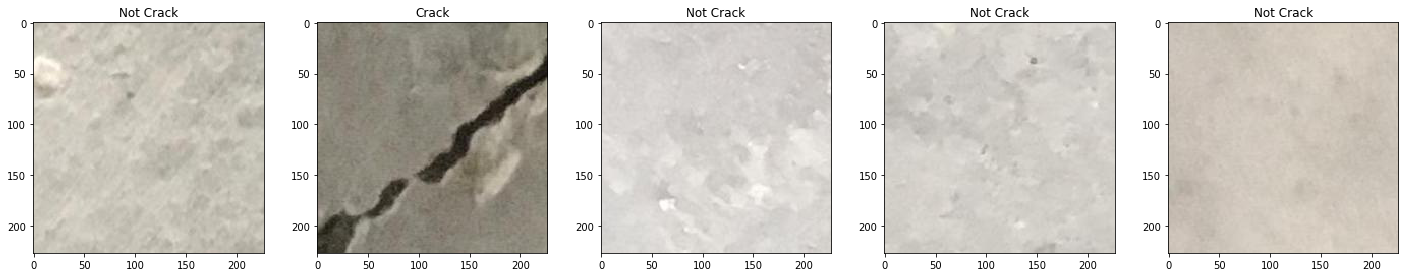

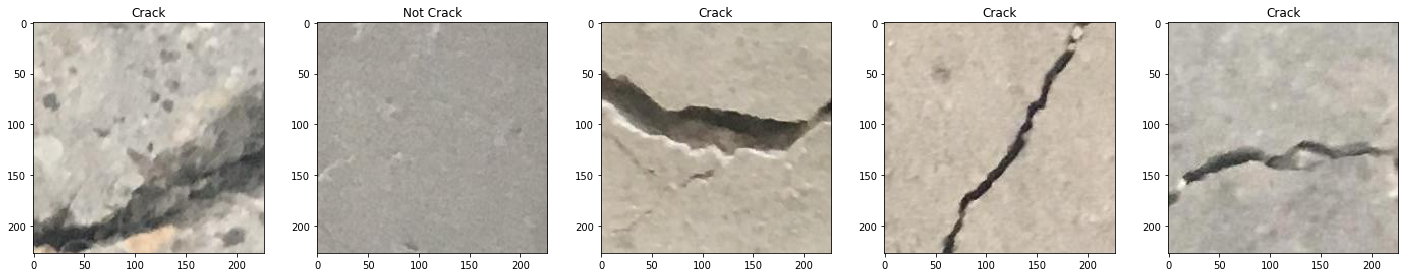

In [107]:
import numpy as np

predictions_16K = lenetModel_16K.predict(imgarr_16K)
pred_class_arr_16K = np.array(predictions_16K).round()
counter = 0
for i in range(2):
    fig = plt.figure(figsize=(50, 50))
    for j in range(5):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(imgarr_16K[counter])
        if(pred_class_arr_16K[counter] == 0):
            axisarr.set_title('Crack')
        else:
            axisarr.set_title('Not Crack')
        counter += 1

In [50]:
#save the model
lenetModel_16K.save(
    'lenet_model_16K.h5',
    overwrite=True,
    include_optimizer=True,
)

In [51]:
lenetModel_16K.save_weights('lenetModelWeights_16K.h5')

# Now we will use 24K images out of total 40K images
# 12K images with crack and 12K images without crack
#### Make folders and move images into them
#### This schema will be used by ImageDataGeneratorClass of Keras

In [53]:
#creating directory structures which is required for our model to train.
#first we will create folders and will store total 24K images(12K images with crack and 12K images without crack)
os.mkdir('data_24k')
os.mkdir('data_24k/train')
os.mkdir('data_24k/test')
os.mkdir('data_24k/validation')
os.mkdir('data_24k/visualization/real_images')

os.mkdir('data_24k/train/crack')
os.mkdir('data_24k/train/uncrack')
os.mkdir('data_24k/test/crack')
os.mkdir('data_24k/test/uncrack')
os.mkdir('data_24k/validation/crack')
os.mkdir('data_24k/validation/uncrack')

In [54]:
#let's choose first 12K images from crack and uncrack images
first_12K_crack_images_path = crack_images_path[0:12000]
first_12K_uncrack_images_path = uncrack_images_path[0:12000]

In [55]:
print(len(first_12K_crack_images_path), len(first_12K_uncrack_images_path))

12000 12000


In [56]:
#split crack and uncrack images into train, test, validation and visualization
#70% for training and rest 30% for testing(15%), validation(almost 15%), visualization(5 images each from cracks and non-cracks)
train_crack_12K = first_12K_crack_images_path[0:8400]  #out of 12K, 8.4K images are for training the model
test_crack_12K = first_12K_crack_images_path[8400:10200]  #out of 12K, 1.8K images are for testing the model
validation_crack_12K = first_12K_crack_images_path[10200:11995]  #out of 12K, 1.795K images are for validation of the model
visualization_crack_12K = first_12K_crack_images_path[11995:12000]  #5 are reserved for visualization of the model

train_uncrack_12K = first_12K_uncrack_images_path[0:8400]  #out of 12K, 8.4K images are for training the model
test_uncrack_12K = first_12K_uncrack_images_path[8400:10200]  #out of 12K, 1.8K images are for testing the model
validation_uncrack_12K = first_12K_uncrack_images_path[10200:11995]  #out of 12K, 1.795K images are for validation of the model
visualization_uncrack_12K = first_12K_uncrack_images_path[11995:12000]  #5 are reserved for visualization of the model

In [57]:
#now copy these images into the respective folders

base_dir = 'data_24k/'

#copying train_crack into data_24K/train/crack
for image in train_crack_12K:
    dest = os.path.join(base_dir, 'train/crack/')
    shutil.copy(image, dest)

#copying test_crack into data_24K/test/crack
for image in test_crack_12K:
    dest = os.path.join(base_dir, 'test/crack/')
    shutil.copy(image, dest)
    
#copying validation_crack into data_24K/validation/crack
for image in validation_crack_12K:
    dest = os.path.join(base_dir, 'validation/crack/')
    shutil.copy(image, dest)
    
#copying visualization_cracl into data_24K/visualization
for image in visualization_crack_12K:
    dest = os.path.join(base_dir, 'visualization/real_images')
    shutil.copy(image, dest)
    
#copying train_uncrack into data_24K/train/uncrack
for image in train_uncrack_12K:
    dest = os.path.join(base_dir, 'train/uncrack/')
    shutil.copy(image, dest)
    
#copying test_uncrack into data_24K/test/uncrack
for image in test_uncrack_12K:
    dest = os.path.join(base_dir, 'test/uncrack/')
    shutil.copy(image, dest)
    
#copying validation_uncrack into data_24K/validation/uncrack
for image in validation_uncrack_12K:
    dest = os.path.join(base_dir, 'validation/uncrack/')
    shutil.copy(image, dest)
    
#copying visualization into data_24K/visualization
for image in visualization_uncrack_12K:
    dest = os.path.join(base_dir, 'visualization/real_images')
    shutil.copy(image, dest)

### LeNet - 5 CNN Model for 24K images

In [58]:
lenetModel_24K = Sequential()
lenetModel_24K.add(Conv2D(6, (5, 5), strides=(1, 1), padding='valid', input_shape=(227, 227, 3)))
lenetModel_24K.add(Activation('relu'))
lenetModel_24K.add(AveragePooling2D(pool_size=(2, 2), strides=(2,2)))

lenetModel_24K.add(Conv2D(16, (5, 5), padding='valid'))
lenetModel_24K.add(Activation('relu'))
lenetModel_24K.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

lenetModel_24K.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
lenetModel_24K.add(Dense(120))
lenetModel_24K.add(Activation('relu'))
lenetModel_24K.add(Dense(units=84))
lenetModel_24K.add(Activation('relu'))
lenetModel_24K.add(Dense(1)) # this our output layer (since this is binary classification of cracked or uncracked, we use only one unit in output layer).
lenetModel_24K.add(Activation('sigmoid'))

lenetModel_24K.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
lenetModel_24K.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 223, 223, 6)       456       
_________________________________________________________________
activation_11 (Activation)   (None, 223, 223, 6)       0         
_________________________________________________________________
average_pooling2d_5 (Average (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 107, 107, 16)      2416      
_________________________________________________________________
activation_12 (Activation)   (None, 107, 107, 16)      0         
_________________________________________________________________
average_pooling2d_6 (Average (None, 53, 53, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 44944)            

In [ ]:
# lenetModel_24K.load_weights('lenetModelWeights_24K.h5')

In [59]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32

# this is the augmentation configuration we will use for training
#here along with rescaling, we are also changing the orientation of the image in only training dataset, 
#this is we are doing so that our model never sees the same image, and this will help in fighting overfitting.
train_datagen_24K = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing, validation, visualization:
# only rescaling
test_datagen_24K = ImageDataGenerator(rescale=1./255)
validation_datagen_24K = ImageDataGenerator(rescale=1./255)
visualization_datagen_24K = ImageDataGenerator(rescale=1./255)


# this is a generator that will read pictures found in
# subfolers of 'master_data/train', and indefinitely generate
# batches of augmented image data
train_generator_24K = train_datagen_24K.flow_from_directory(
        'data_24k/train',  # this is the target directory
        target_size=(227, 227),  # all images will be resized to 227*227
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for test data
test_generator_24K = test_datagen_24K.flow_from_directory(
        'data_24k/test',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for validation data
validation_generator_24K = validation_datagen_24K.flow_from_directory(
        'data_24k/validation',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for visualization data
visualization_generator_24K = visualization_datagen_24K.flow_from_directory(
        'data_24k/visualization',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

Found 16800 images belonging to 2 classes.
Found 3600 images belonging to 2 classes.
Found 3590 images belonging to 2 classes.
Found 10 images belonging to 1 classes.


In [60]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

In [61]:
import time
start_time_24k = time.time() 
lenetModel_24K.fit_generator(
        train_generator_24K,
        epochs=10,
        validation_data=validation_generator_24K,
        callbacks=[es]
)
finish_time_24k = time.time()
time_taken_24k = finish_time_24k - start_time_24k
print('\n')
print('Training complete in {:.0f}m {:.0f}s'.format(time_taken_24k // 60, time_taken_24k % 60))

Epoch 1/10
525/525 [==============================] - 222s 422ms/step - loss: 0.1852 - accuracy: 0.9295 - precision_3: 0.9209 - recall_3: 0.9396 - val_loss: 0.0173 - val_accuracy: 0.9844 - val_precision_3: 0.9860 - val_recall_3: 0.9827
Epoch 2/10
525/525 [==============================] - 146s 278ms/step - loss: 0.0766 - accuracy: 0.9805 - precision_3: 0.9761 - recall_3: 0.9851 - val_loss: 0.0049 - val_accuracy: 0.9872 - val_precision_3: 0.9818 - val_recall_3: 0.9928
Epoch 3/10
525/525 [==============================] - 144s 274ms/step - loss: 0.0595 - accuracy: 0.9799 - precision_3: 0.9747 - recall_3: 0.9854 - val_loss: 0.2804 - val_accuracy: 0.9833 - val_precision_3: 0.9707 - val_recall_3: 0.9967
Epoch 4/10
525/525 [==============================] - 143s 272ms/step - loss: 0.0404 - accuracy: 0.9866 - precision_3: 0.9847 - recall_3: 0.9886 - val_loss: 0.0293 - val_accuracy: 0.9774 - val_precision_3: 0.9588 - val_recall_3: 0.9978
Epoch 5/10
525/525 [==============================] - 14

In [62]:
test_loss_24K, accuracy_24K, precision_24K, recall_24K = lenetModel_24K.evaluate_generator(test_generator_24K)

In [63]:
print(' accuracy_24K : ', accuracy_24K, '\n', 'precision_24K : ', precision_24K, '\n', 'recall_24K : ', recall_24K)

 accuracy_24K :  0.9858333468437195 
 precision_24K :  0.9932318329811096 
 recall_24K :  0.9783333539962769


### VISUALISING PREDICTIONS OF LENET MODEL TRAINED ON 24K IMAGES

In [64]:
imgarr_24K = visualization_generator_24K[0][0]
imgarr_24K.shape

(10, 227, 227, 3)

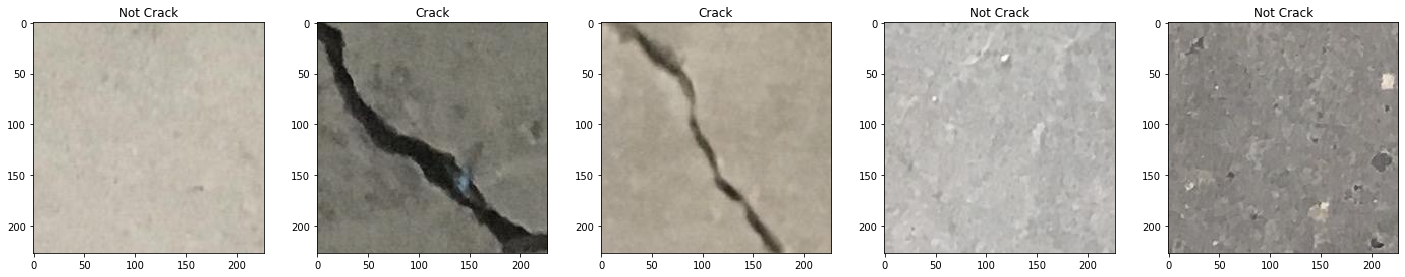

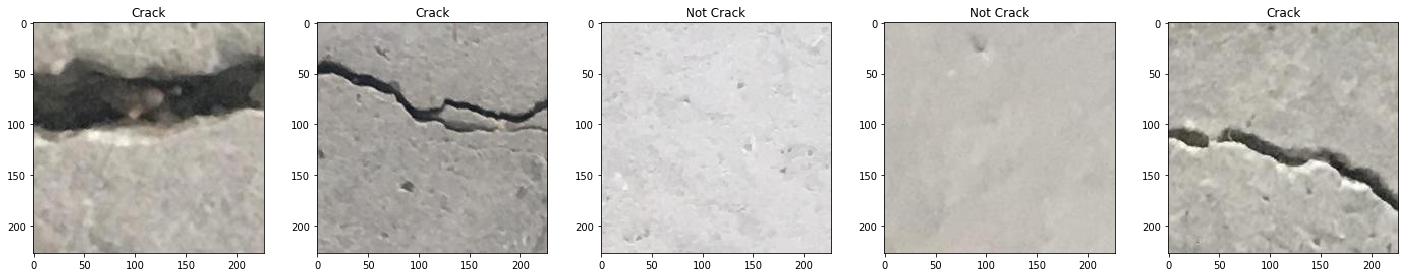

In [106]:
import numpy as np

predictions_24K = lenetModel_24K.predict(imgarr_24K)
pred_class_arr_24K = np.array(predictions_24K).round()
counter = 0
for i in range(2):
    fig = plt.figure(figsize=(50, 50))
    for j in range(5):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(imgarr_24K[counter])
        if(pred_class_arr_24K[counter] == 0):
            axisarr.set_title('Crack')
        else:
            axisarr.set_title('Not Crack')
        counter += 1

In [66]:
#save the model
lenetModel_24K.save(
    'lenet_model_24K.h5',
    overwrite=True,
    include_optimizer=True,
)

In [67]:
lenetModel_24K.save_weights('lenetModelWeights_24K.h5')

# Now we will use 32K images out of total 40K images¶
# 16K images with crack and 16K images without crack
#### Make folders and move images into them
#### This schema will be used by ImageDataGeneratorClass of Keras

In [69]:
#creating directory structures which is required for our model to train.
#first we will create folders and will store total 32K images(16K images with crack and 16K images without crack)
os.mkdir('data_32k')
os.mkdir('data_32k/train')
os.mkdir('data_32k/test')
os.mkdir('data_32k/validation')
os.mkdir('data_32k/visualization')

os.mkdir('data_32k/train/crack')
os.mkdir('data_32k/train/uncrack')
os.mkdir('data_32k/test/crack')
os.mkdir('data_32k/test/uncrack')
os.mkdir('data_32k/validation/crack')
os.mkdir('data_32k/validation/uncrack')
os.mkdir('data_32k/visualization/real_images')

In [72]:
#let's choose first 12K images from crack and uncrack images
first_16K_crack_images_path = crack_images_path[0:16000]
first_16K_uncrack_images_path = uncrack_images_path[0:16000]

In [73]:
print(len(first_16K_crack_images_path), len(first_16K_uncrack_images_path))

16000 16000


In [74]:
#split crack and uncrack images into train, test, validation and visualization
#70% for training and rest 30% for testing(15%), validation(almost 15%), visualization(5 images each from cracks and non-cracks)
train_crack_16K = first_16K_crack_images_path[0:11200]  #out of 16K, 11.2K images are for training the model
test_crack_16K = first_16K_crack_images_path[11200:13600]  #out of 16K, 2.4K images are for testing the model
validation_crack_16K = first_16K_crack_images_path[13600:15995]  #out of 16K, 2.395K images are for validation of the model
visualization_crack_16K = first_16K_crack_images_path[15995:16000]  #5 are reserved for visualization of the model

train_uncrack_16K = first_16K_uncrack_images_path[0:11200]  #out of 16K, 11.2K images are for training the model
test_uncrack_16K = first_16K_uncrack_images_path[11200:13600]  #out of 16K, 2.4K images are for testing the model
validation_uncrack_16K = first_16K_uncrack_images_path[13600:15995]  #out of 16K, 2.395K images are for validation of the model
visualization_uncrack_16K = first_16K_uncrack_images_path[15995:16000]  #5 are reserved for visualization of the model

In [75]:
#now copy these images into the respective folders

base_dir = 'data_32k/'

#copying train_crack into data_32K/train/crack
for image in train_crack_16K:
    dest = os.path.join(base_dir, 'train/crack/')
    shutil.copy(image, dest)

#copying test_crack into data_32K/test/crack
for image in test_crack_16K:
    dest = os.path.join(base_dir, 'test/crack/')
    shutil.copy(image, dest)
    
#copying validation_crack into data_32K/validation/crack
for image in validation_crack_16K:
    dest = os.path.join(base_dir, 'validation/crack/')
    shutil.copy(image, dest)
    
#copying visualization_cracl into data_32K/visualization
for image in visualization_crack_16K:
    dest = os.path.join(base_dir, 'visualization/real_images')
    shutil.copy(image, dest)
    
#copying train_uncrack into data_32K/train/uncrack
for image in train_uncrack_16K:
    dest = os.path.join(base_dir, 'train/uncrack/')
    shutil.copy(image, dest)
    
#copying test_uncrack into data_32K/test/uncrack
for image in test_uncrack_16K:
    dest = os.path.join(base_dir, 'test/uncrack/')
    shutil.copy(image, dest)
    
#copying validation_uncrack into data_32K/validation/uncrack
for image in validation_uncrack_16K:
    dest = os.path.join(base_dir, 'validation/uncrack/')
    shutil.copy(image, dest)
    
#copying visualization into data_32K/visualization
for image in visualization_uncrack_16K:
    dest = os.path.join(base_dir, 'visualization/real_images')
    shutil.copy(image, dest)

### LeNet - 5 CNN Model for 32K images

In [76]:
lenetModel_32K = Sequential()
lenetModel_32K.add(Conv2D(6, (5, 5), strides=(1, 1), padding='valid', input_shape=(227, 227, 3)))
lenetModel_32K.add(Activation('relu'))
lenetModel_32K.add(AveragePooling2D(pool_size=(2, 2), strides=(2,2)))

lenetModel_32K.add(Conv2D(16, (5, 5), padding='valid'))
lenetModel_32K.add(Activation('relu'))
lenetModel_32K.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

lenetModel_32K.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
lenetModel_32K.add(Dense(120))
lenetModel_32K.add(Activation('relu'))
lenetModel_32K.add(Dense(units=84))
lenetModel_32K.add(Activation('relu'))
lenetModel_32K.add(Dense(1)) # this our output layer (since this is binary classification of cracked or uncracked, we use only one unit in output layer).
lenetModel_32K.add(Activation('sigmoid'))

lenetModel_32K.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
lenetModel_32K.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 223, 223, 6)       456       
_________________________________________________________________
activation_16 (Activation)   (None, 223, 223, 6)       0         
_________________________________________________________________
average_pooling2d_7 (Average (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 107, 107, 16)      2416      
_________________________________________________________________
activation_17 (Activation)   (None, 107, 107, 16)      0         
_________________________________________________________________
average_pooling2d_8 (Average (None, 53, 53, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 44944)            

In [ ]:
# lenetModel_32K.load_weights('lenetModelWeights_32K.h5')

In [77]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32

# this is the augmentation configuration we will use for training
#here along with rescaling, we are also changing the orientation of the image in only training dataset, 
#this is we are doing so that our model never sees the same image, and this will help in fighting overfitting.
train_datagen_32K = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing, validation, visualization:
# only rescaling
test_datagen_32K = ImageDataGenerator(rescale=1./255)
validation_datagen_32K = ImageDataGenerator(rescale=1./255)
visualization_datagen_32K = ImageDataGenerator(rescale=1./255)


# this is a generator that will read pictures found in
# subfolers of 'master_data/train', and indefinitely generate
# batches of augmented image data
train_generator_32K = train_datagen_32K.flow_from_directory(
        'data_32k/train',  # this is the target directory
        target_size=(227, 227),  # all images will be resized to 227*227
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for test data
test_generator_32K = test_datagen_32K.flow_from_directory(
        'data_32k/test',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for validation data
validation_generator_32K = validation_datagen_32K.flow_from_directory(
        'data_32k/validation',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for visualization data
visualization_generator_32K = visualization_datagen_32K.flow_from_directory(
        'data_32k/visualization',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

Found 22400 images belonging to 2 classes.
Found 4800 images belonging to 2 classes.
Found 4790 images belonging to 2 classes.
Found 10 images belonging to 1 classes.


In [78]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

In [79]:
import time
start_time_32k = time.time() 
lenetModel_32K.fit_generator(
        train_generator_32K,
        epochs=10,
        validation_data=validation_generator_32K,
        callbacks=[es]
)
finish_time_32k = time.time()
time_taken_32k = finish_time_32k - start_time_32k
print('\n')
print('Training complete in {:.0f}m {:.0f}s'.format(time_taken_32k // 60, time_taken_32k % 60))

Epoch 1/10
700/700 [==============================] - 294s 420ms/step - loss: 0.2012 - accuracy: 0.9148 - precision_4: 0.9046 - recall_4: 0.9274 - val_loss: 0.0040 - val_accuracy: 0.9862 - val_precision_4: 0.9834 - val_recall_4: 0.9891
Epoch 2/10
700/700 [==============================] - 194s 277ms/step - loss: 0.0630 - accuracy: 0.9811 - precision_4: 0.9791 - recall_4: 0.9831 - val_loss: 0.0806 - val_accuracy: 0.9856 - val_precision_4: 0.9966 - val_recall_4: 0.9745
Epoch 3/10
700/700 [==============================] - 194s 278ms/step - loss: 0.0490 - accuracy: 0.9842 - precision_4: 0.9847 - recall_4: 0.9837 - val_loss: 0.0087 - val_accuracy: 0.9908 - val_precision_4: 0.9929 - val_recall_4: 0.9887
Epoch 4/10
700/700 [==============================] - 197s 282ms/step - loss: 0.0634 - accuracy: 0.9821 - precision_4: 0.9823 - recall_4: 0.9818 - val_loss: 0.0086 - val_accuracy: 0.9848 - val_precision_4: 0.9878 - val_recall_4: 0.9816
Epoch 5/10
700/700 [==============================] - 19

In [80]:
test_loss_32K, accuracy_32K, precision_32K, recall_32K = lenetModel_32K.evaluate_generator(test_generator_32K)

In [81]:
print(' accuracy_32K : ', accuracy_32K, '\n', 'precision_32K : ', precision_32K, '\n', 'recall_32K : ', recall_32K)

 accuracy_32K :  0.9787499904632568 
 precision_32K :  0.9939810633659363 
 recall_32K :  0.9633333086967468


### VISUALISING PREDICTIONS OF LENET MODEL TRAINED ON 32K IMAGES

In [82]:
imgarr_32K = visualization_generator_32K[0][0]
imgarr_32K.shape

(10, 227, 227, 3)

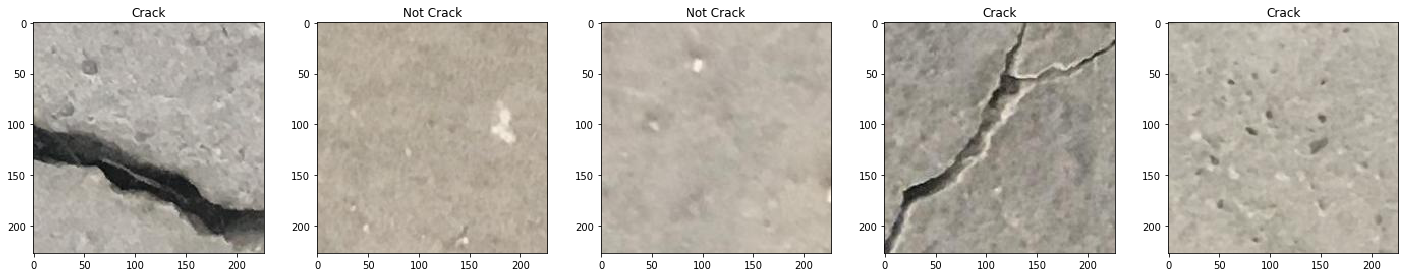

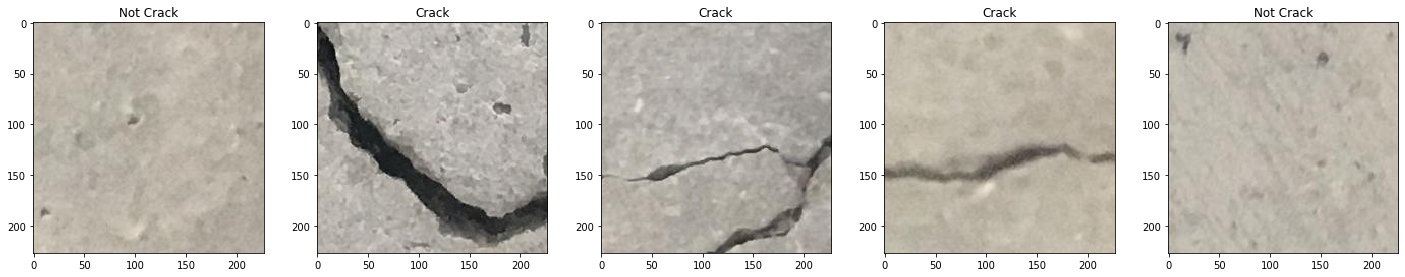

In [105]:
import numpy as np

predictions_32K = lenetModel_32K.predict(imgarr_32K)
pred_class_arr_32K = np.array(predictions_32K).round()
counter = 0
for i in range(2):
    fig = plt.figure(figsize=(50, 50))
    for j in range(5):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(imgarr_32K[counter])
        if(pred_class_arr_32K[counter] == 0):
            axisarr.set_title('Crack')
        else:
            axisarr.set_title('Not Crack')
        counter += 1

In [84]:
#save the model
lenetModel_32K.save(
    'lenet_model_32K.h5',
    overwrite=True,
    include_optimizer=True,
)

In [85]:
lenetModel_32K.save_weights('lenetModelWeights_32K.h5')

# Now we will use all 40K images¶
# 20K images with crack and 20K images without crack
#### Make folders and move images into them
#### This schema will be used by ImageDataGeneratorClass of Keras

In [86]:
#creating directory structures which is required for our model to train.
#first we will create folders and will store total 40K images(20K images with crack and 20K images without crack)
os.mkdir('data_40k')
os.mkdir('data_40k/train')
os.mkdir('data_40k/test')
os.mkdir('data_40k/validation')
os.mkdir('data_40k/visualization')

os.mkdir('data_40k/train/crack')
os.mkdir('data_40k/train/uncrack')
os.mkdir('data_40k/test/crack')
os.mkdir('data_40k/test/uncrack')
os.mkdir('data_40k/validation/crack')
os.mkdir('data_40k/validation/uncrack')
os.mkdir('data_40k/visualization/real_images')

In [87]:
#let's choose first 20K images from crack and uncrack images
first_20K_crack_images_path = crack_images_path[:]
first_20K_uncrack_images_path = uncrack_images_path[:]

In [88]:
print(len(first_20K_crack_images_path), len(first_20K_uncrack_images_path))

20000 20000


In [91]:
#split crack and uncrack images into train, test, validation and visualization
#70% for training and rest 30% for testing(15%), validation(almost 15%), visualization(5 images each from cracks and non-cracks)
train_crack_20K = first_20K_crack_images_path[0:14000]  #out of 20K, 14K images are for training the model
test_crack_20K = first_20K_crack_images_path[14000:17000]  #out of 20K, 3K images are for testing the model
validation_crack_20K = first_20K_crack_images_path[17000:19995]  #out of 20K, 2.995K images are for validation of the model
visualization_crack_20K = first_20K_crack_images_path[19995:20000]  #5 are reserved for visualization of the model

train_uncrack_20K = first_20K_uncrack_images_path[0:14000]  #out of 20K, 14K images are for training the model
test_uncrack_20K = first_20K_uncrack_images_path[14000:17000]  #out of 20K, 3K images are for testing the model
validation_uncrack_20K = first_20K_uncrack_images_path[17000:19995]  #out of 20K, 2.995K images are for validation of the model
visualization_uncrack_20K = first_20K_uncrack_images_path[19995:20000]  #5 are reserved for visualization of the model

In [94]:
#now copy these images into the respective folders

base_dir = 'data_40k/'

#copying train_crack into data_40K/train/crack
for image in train_crack_20K:
    dest = os.path.join(base_dir, 'train/crack/')
    shutil.copy(image, dest)

#copying test_crack into data_40K/test/crack
for image in test_crack_20K:
    dest = os.path.join(base_dir, 'test/crack/')
    shutil.copy(image, dest)
    
#copying validation_crack into data_40K/validation/crack
for image in validation_crack_20K:
    dest = os.path.join(base_dir, 'validation/crack/')
    shutil.copy(image, dest)
    
#copying visualization_cracl into data_40K/visualization
for image in visualization_crack_20K:
    dest = os.path.join(base_dir, 'visualization/real_images')
    shutil.copy(image, dest)
    
#copying train_uncrack into data_40K/train/uncrack
for image in train_uncrack_20K:
    dest = os.path.join(base_dir, 'train/uncrack/')
    shutil.copy(image, dest)
    
#copying test_uncrack into data_40K/test/uncrack
for image in test_uncrack_20K:
    dest = os.path.join(base_dir, 'test/uncrack/')
    shutil.copy(image, dest)
    
#copying validation_uncrack into data_40K/validation/uncrack
for image in validation_uncrack_20K:
    dest = os.path.join(base_dir, 'validation/uncrack/')
    shutil.copy(image, dest)
    
#copying visualization into data_40K/visualization
for image in visualization_uncrack_20K:
    dest = os.path.join(base_dir, 'visualization/real_images')
    shutil.copy(image, dest)

### LeNet - 5 CNN Model for 40K images

In [95]:
lenetModel_40K = Sequential()
lenetModel_40K.add(Conv2D(6, (5, 5), strides=(1, 1), padding='valid', input_shape=(227, 227, 3)))
lenetModel_40K.add(Activation('relu'))
lenetModel_40K.add(AveragePooling2D(pool_size=(2, 2), strides=(2,2)))

lenetModel_40K.add(Conv2D(16, (5, 5), padding='valid'))
lenetModel_40K.add(Activation('relu'))
lenetModel_40K.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

lenetModel_40K.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
lenetModel_40K.add(Dense(120))
lenetModel_40K.add(Activation('relu'))
lenetModel_40K.add(Dense(units=84))
lenetModel_40K.add(Activation('relu'))
lenetModel_40K.add(Dense(1)) # this our output layer (since this is binary classification of cracked or uncracked, we use only one unit in output layer).
lenetModel_40K.add(Activation('sigmoid'))

lenetModel_40K.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
lenetModel_40K.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 223, 223, 6)       456       
_________________________________________________________________
activation_21 (Activation)   (None, 223, 223, 6)       0         
_________________________________________________________________
average_pooling2d_9 (Average (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 107, 107, 16)      2416      
_________________________________________________________________
activation_22 (Activation)   (None, 107, 107, 16)      0         
_________________________________________________________________
average_pooling2d_10 (Averag (None, 53, 53, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 44944)            

In [ ]:
# lenetModel_40K.load_weights('lenetModelWeights_40K.h5')

In [96]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32

# this is the augmentation configuration we will use for training
#here along with rescaling, we are also changing the orientation of the image in only training dataset, 
#this is we are doing so that our model never sees the same image, and this will help in fighting overfitting.
train_datagen_40K = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing, validation, visualization:
# only rescaling
test_datagen_40K = ImageDataGenerator(rescale=1./255)
validation_datagen_40K = ImageDataGenerator(rescale=1./255)
visualization_datagen_40K = ImageDataGenerator(rescale=1./255)


# this is a generator that will read pictures found in
# subfolers of 'master_data/train', and indefinitely generate
# batches of augmented image data
train_generator_40K = train_datagen_40K.flow_from_directory(
        'data_40k/train',  # this is the target directory
        target_size=(227, 227),  # all images will be resized to 227*227
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for test data
test_generator_40K = test_datagen_40K.flow_from_directory(
        'data_40k/test',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for validation data
validation_generator_40K = validation_datagen_40K.flow_from_directory(
        'data_40k/validation',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for visualization data
visualization_generator_40K = visualization_datagen_40K.flow_from_directory(
        'data_40k/visualization',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

Found 28000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Found 5990 images belonging to 2 classes.
Found 10 images belonging to 1 classes.


In [97]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

In [98]:
import time
start_time_40k = time.time() 
lenetModel_40K.fit_generator(
        train_generator_40K,
        epochs=10,
        validation_data=validation_generator_40K,
        callbacks=[es]
)
finish_time_40k = time.time()
time_taken_40k = finish_time_40k - start_time_40k
print('\n')
print('Training complete in {:.0f}m {:.0f}s'.format(time_taken_40k // 60, time_taken_40k % 60))

Epoch 1/10
875/875 [==============================] - 633s 723ms/step - loss: 0.1125 - accuracy: 0.9566 - precision_5: 0.9540 - recall_5: 0.9594 - val_loss: 9.2859e-04 - val_accuracy: 0.9870 - val_precision_5: 0.9825 - val_recall_5: 0.9917
Epoch 2/10
875/875 [==============================] - 452s 517ms/step - loss: 0.0716 - accuracy: 0.9781 - precision_5: 0.9755 - recall_5: 0.9809 - val_loss: 0.0019 - val_accuracy: 0.9880 - val_precision_5: 0.9835 - val_recall_5: 0.9927
Epoch 3/10
875/875 [==============================] - 443s 507ms/step - loss: 0.0445 - accuracy: 0.9853 - precision_5: 0.9840 - recall_5: 0.9867 - val_loss: 0.0507 - val_accuracy: 0.9880 - val_precision_5: 0.9831 - val_recall_5: 0.9930
Epoch 4/10
875/875 [==============================] - 433s 495ms/step - loss: 0.0661 - accuracy: 0.9832 - precision_5: 0.9787 - recall_5: 0.9879 - val_loss: 0.0671 - val_accuracy: 0.9843 - val_precision_5: 0.9899 - val_recall_5: 0.9786
Epoch 5/10
875/875 [==============================] 

In [99]:
test_loss_40K, accuracy_40K, precision_40K, recall_40K = lenetModel_40K.evaluate_generator(test_generator_40K)

In [100]:
print(' accuracy_40K : ', accuracy_40K, '\n', 'precision_40K : ', precision_40K, '\n', 'recall_40K : ', recall_40K)

 accuracy_40K :  0.9891666769981384 
 precision_40K :  0.9870560765266418 
 recall_40K :  0.9913333058357239


### VISUALISING PREDICTIONS OF LENET MODEL TRAINED ON 40K IMAGES

In [101]:
imgarr_40K = visualization_generator_40K[0][0]
imgarr_40K.shape

(10, 227, 227, 3)

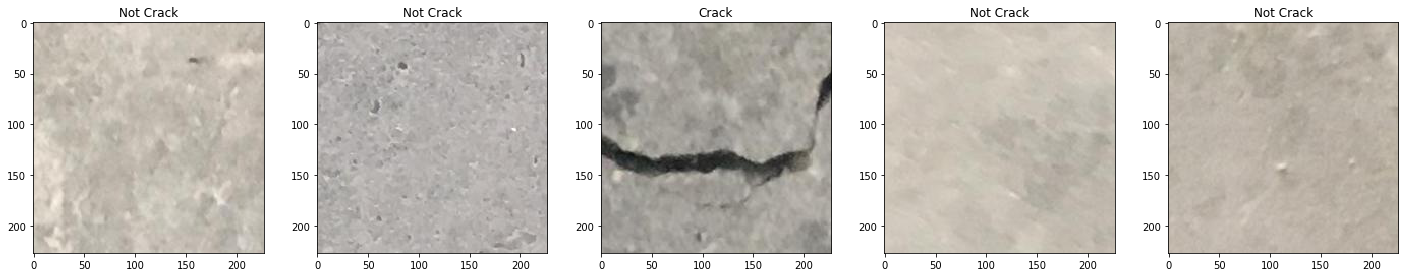

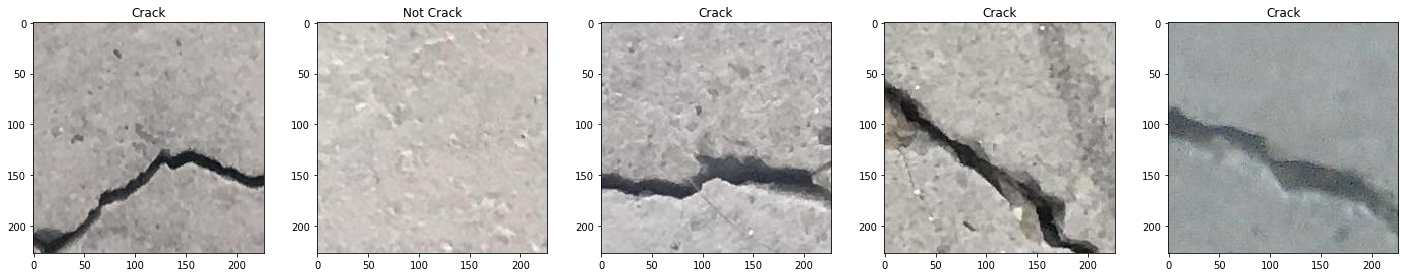

In [102]:
import numpy as np

predictions_40K = lenetModel_40K.predict(imgarr_40K)
pred_class_arr_40K = np.array(predictions_40K).round()
counter = 0
for i in range(2):
    fig = plt.figure(figsize=(50, 50))
    for j in range(5):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(imgarr_40K[counter])
        if(pred_class_arr_40K[counter] == 0):
            axisarr.set_title('Crack')
        else:
            axisarr.set_title('Not Crack')
        counter += 1

In [103]:
#save the model
lenetModel_40K.save(
    'lenet_model_40K.h5',
    overwrite=True,
    include_optimizer=True,
)

In [104]:
lenetModel_40K.save_weights('lenetModelWeights_40K.h5')